In [1]:
import pandas as pd

In [24]:
dt=pd.read_excel("/content/StockData.xlsx")

In [25]:
dt.head()

,Index,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Adj Close_AAPL,Volume_AAPL,Open_MSFT,High_MSFT,...,Low_GOOGL,Close_GOOGL,Adj Close_GOOGL,Volume_GOOGL,Open_AMZN,High_AMZN,Low_AMZN,Close_AMZN,Adj Close_AMZN,Volume_AMZN
0,0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498682,212818400,46.660000,47.419998,...,26.393999,26.477501,26.477501,26480000,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
1,1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808514,257142000,46.369999,46.730000,...,25.887501,25.973000,25.973000,41182000,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2,2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810751,263188400,46.380001,46.750000,...,25.277500,25.332001,25.332001,54456000,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
3,3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144638,160423600,45.980000,46.459999,...,25.182501,25.257500,25.257500,46918000,14.8750,15.0640,14.7665,14.9210,14.9210,52806000
4,4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072330,237458000,46.750000,47.750000,...,24.750999,25.345501,25.345501,73054000,15.0160,15.1570,14.8055,15.0230,15.0230,61768000


In [26]:
dt_AAPL=dt[['Close_AAPL','Date']]

In [27]:
dt_AAPL.head()

,Close_AAPL,Date
0,27.332500,2015-01-02
1,26.562500,2015-01-05
2,26.565001,2015-01-06
3,26.937500,2015-01-07
4,27.972500,2015-01-08


In [22]:
dt_AAPL_price=dt_AAPL.set_index('Date',inplace=True)

In [7]:
dt_AAPL.head()

,Close_AAPL
Date,
2015-01-02,27.332500
2015-01-05,26.562500
2015-01-06,26.565001
2015-01-07,26.937500
2015-01-08,27.972500


In [28]:
dt_AAPL.set_index("Date",inplace=True)

In [30]:
train=dt_AAPL[:'2022-06-30']

In [31]:
test=dt_AAPL['2022-06-30':]

In [33]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.2 MB/s eta 0:00:00


In [48]:
from statsmodels.tsa.stattools import adfuller

In [61]:
def test_stationarity(dt_AAPL):
    # Perform Dickey-Fuller test
    result = adfuller(dt_AAPL)

    # Print test statistics
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

    # Check p-value
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary.")
    else:
        print("Fail to reject the null hypothesis. Data is non-stationary.")

# Check stationarity
test_stationarity(dt_AAPL)

ADF Statistic: -0.15462700213976183
p-value: 0.9437182621523739
Critical Values: {'1%': -3.4333477117905487, '5%': -2.8628642889373044, '10%': -2.5674749845110627}
Fail to reject the null hypothesis. Data is non-stationary.


In [62]:
differenced_series = dt_AAPL.diff().dropna()

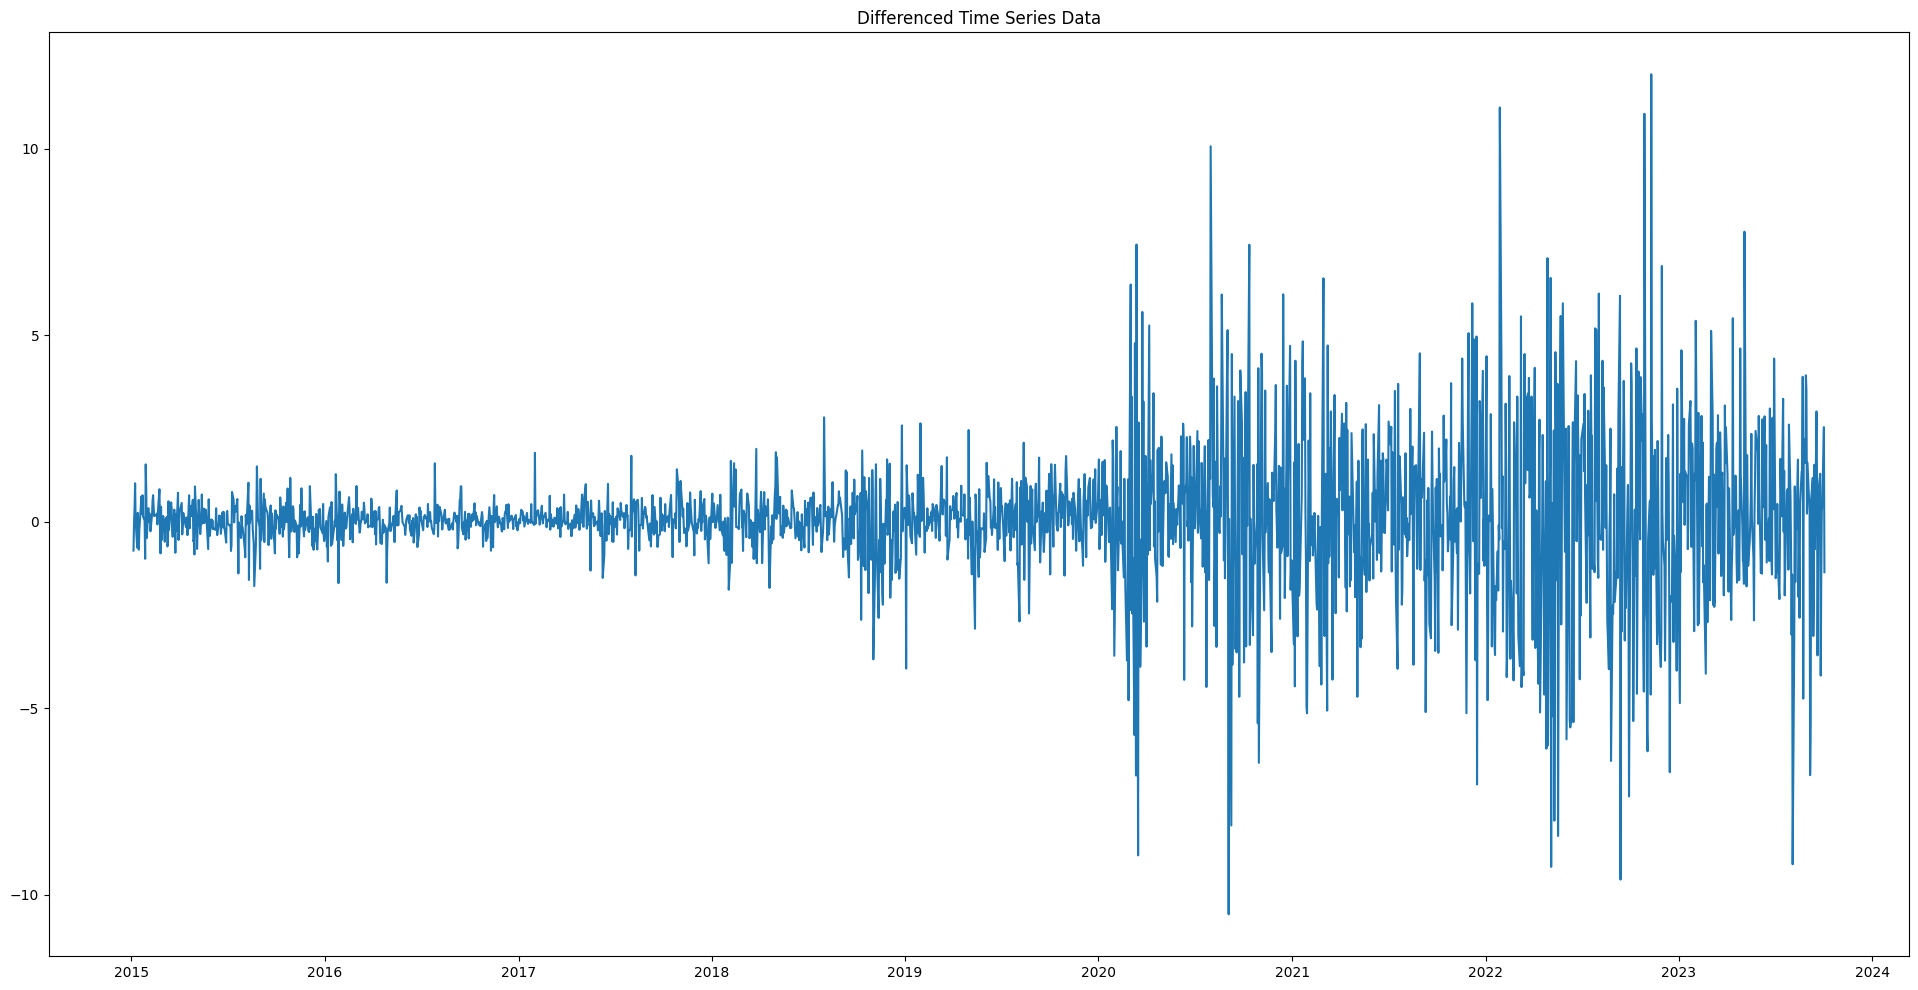

In [63]:
plt.figure(figsize=(24, 12))
plt.plot(differenced_series)
plt.title('Differenced Time Series Data')
plt.show()

In [64]:
test_stationarity(differenced_series)

ADF Statistic: -10.611135374629596
p-value: 5.830038550870281e-19
Critical Values: {'1%': -3.4333477117905487, '5%': -2.8628642889373044, '10%': -2.5674749845110627}
Reject the null hypothesis. Data is stationary.


In [66]:
train_dataset=differenced_series[:'2022-06-30']

In [67]:
test_dataset=differenced_series['2022-06-30':]

In [34]:
from pmdarima import auto_arima

In [68]:
model=auto_arima(train_dataset,seasonal=True,m=5,trace=True,error_action='ignore',suppress_warnings=True)
fitted= model.fit(train_dataset)
print(fitted.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[5] intercept   : AIC=7195.397, Time=7.43 sec
 ARIMA(0,0,0)(0,0,0)[5] intercept   : AIC=7191.483, Time=0.08 sec
 ARIMA(1,0,0)(1,0,0)[5] intercept   : AIC=7188.377, Time=0.43 sec
 ARIMA(0,0,1)(0,0,1)[5] intercept   : AIC=7188.149, Time=0.54 sec
 ARIMA(0,0,0)(0,0,0)[5]             : AIC=7191.879, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[5] intercept   : AIC=7186.364, Time=0.29 sec
 ARIMA(0,0,1)(1,0,0)[5] intercept   : AIC=7188.164, Time=0.38 sec
 ARIMA(0,0,1)(1,0,1)[5] intercept   : AIC=7185.263, Time=2.45 sec
 ARIMA(0,0,1)(2,0,1)[5] intercept   : AIC=7183.532, Time=2.75 sec
 ARIMA(0,0,1)(2,0,0)[5] intercept   : AIC=7187.829, Time=1.38 sec
 ARIMA(0,0,1)(2,0,2)[5] intercept   : AIC=inf, Time=9.99 sec
 ARIMA(0,0,1)(1,0,2)[5] intercept   : AIC=7183.587, Time=2.93 sec
 ARIMA(0,0,0)(2,0,1)[5] intercept   : AIC=7187.885, Time=2.71 sec
 ARIMA(1,0,1)(2,0,1)[5] intercept   : AIC=7184.974, Time=6.82 sec
 ARIMA(0,0,2)(2,0,1)[5] intercept   : 

In [69]:
forecast=model.predict(n_periods=len(test_dataset))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [70]:
print(forecast)

1886    0.760316
1887    0.432262
1888   -0.052800
1889    0.029024
1890   -0.135244
          ...   
2198    0.059685
2199    0.059685
2200    0.059685
2201    0.059685
2202    0.059685
Length: 317, dtype: float64


In [71]:
forecast.index=test.index

In [72]:
print(forecast)

Date
2022-06-30    0.760316
2022-07-01    0.432262
2022-07-05   -0.052800
2022-07-06    0.029024
2022-07-07   -0.135244
                ...   
2023-09-27    0.059685
2023-09-28    0.059685
2023-09-29    0.059685
2023-10-02    0.059685
2023-10-03    0.059685
Length: 317, dtype: float64


In [42]:
import matplotlib.pyplot as plt

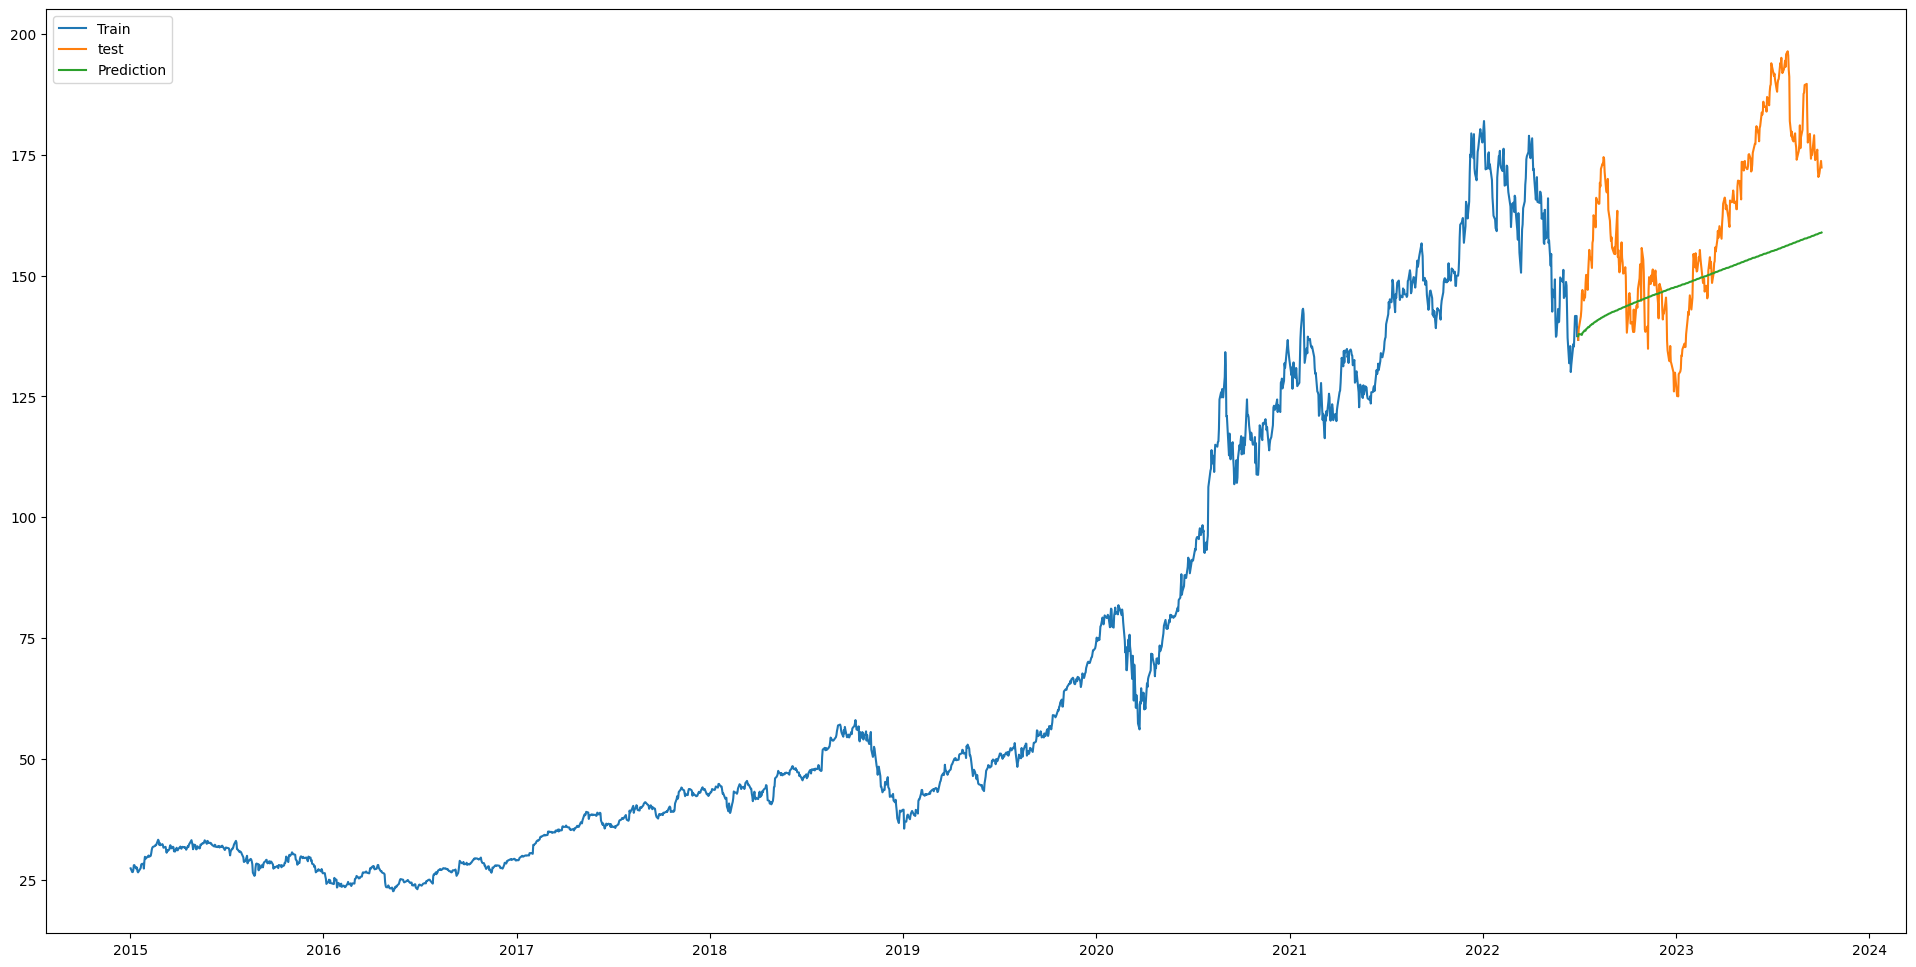

In [43]:
plt.figure(figsize=(24, 12))
plt.plot(train, label='Train')
plt.plot(test, label='test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

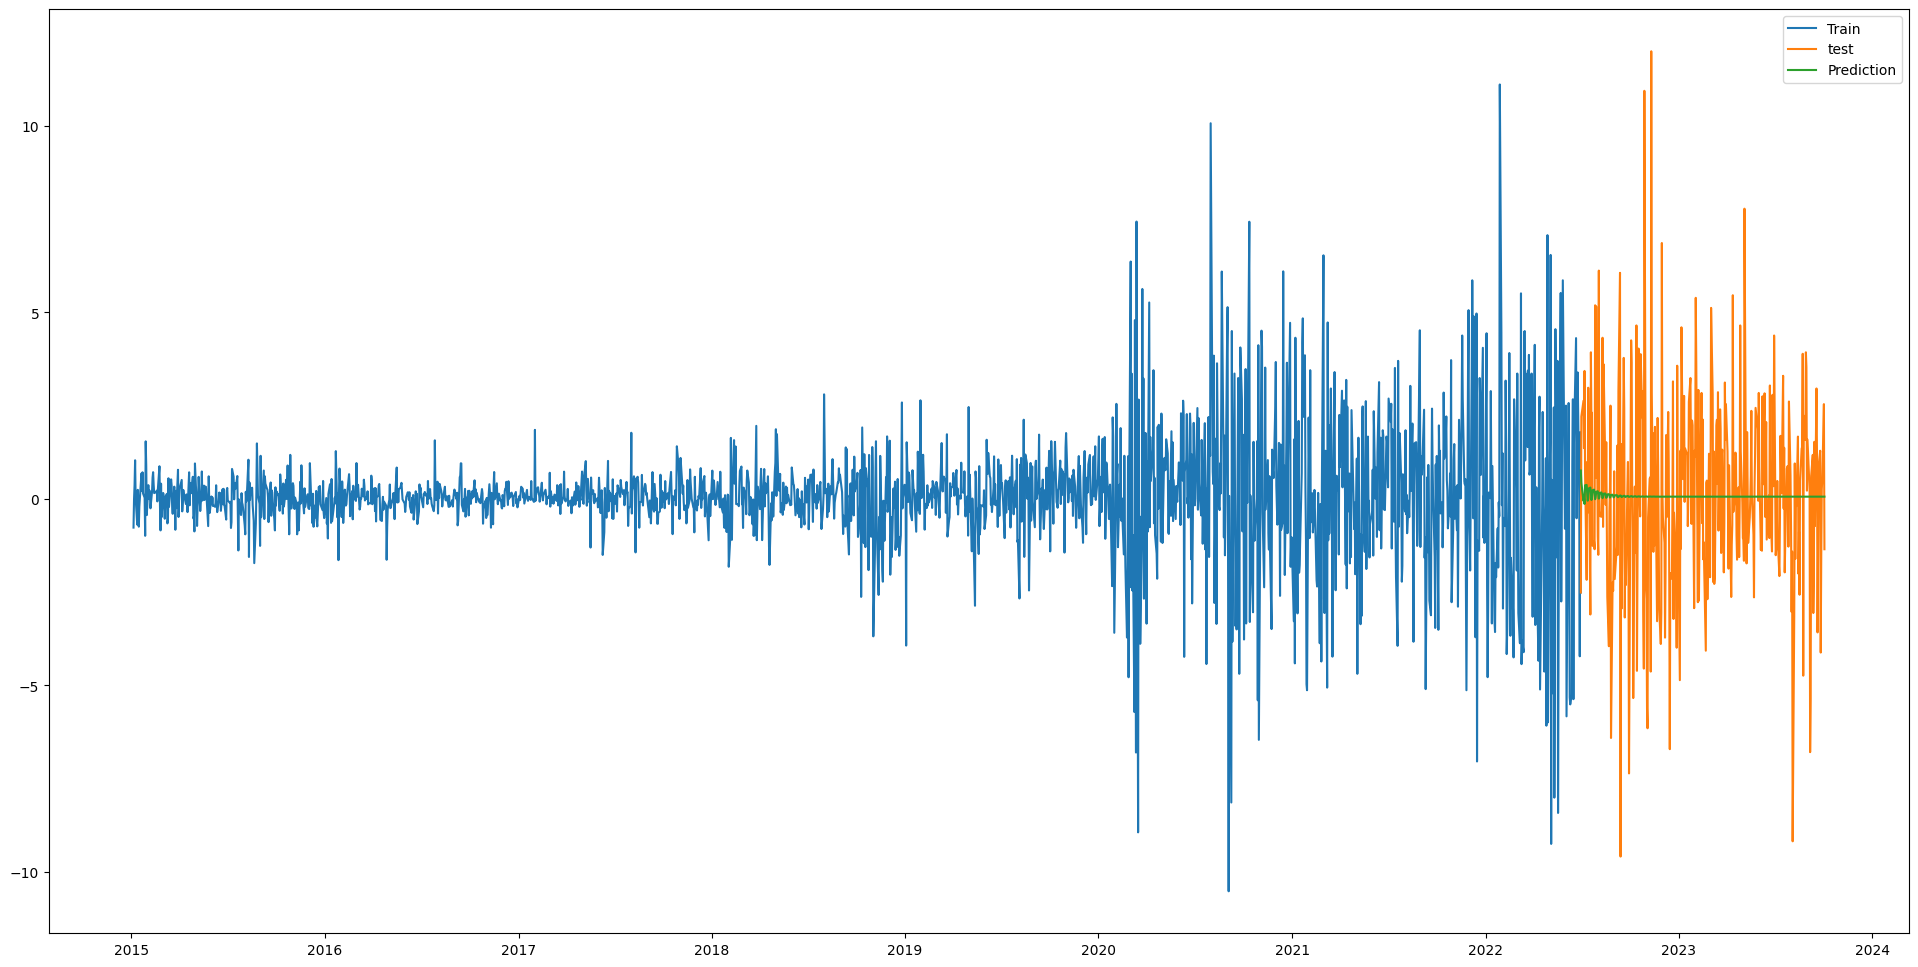

In [73]:
plt.figure(figsize=(24, 12))
plt.plot(train_dataset, label='Train')
plt.plot(test_dataset, label='test')
plt.plot(forecast, label='Prediction')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [45]:
mse = mean_squared_error(test,forecast)

In [46]:
rmse = np.sqrt(mse)

In [47]:
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 18.6121472388149
